As stated in the README, to carry out an analysis of whether there are professional programmers who have not graduated in Computer Science or related degrees, working in the labor market. I used these three questions below to guide the flow of the analysis:

What is and how many people work with professional post that graduated in some other are?

Which country there is more professional?

Which post these professionals occupied?

In [1]:
#first I neeed import the necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Desktop/documentos/projetos/data_science/nano/project_one/survey_results_public_2020.csv')

In [3]:
schema = pd.read_csv('Desktop/documentos/projetos/data_science/nano/project_one/survey_results_schema_2020.csv')

In [4]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
#use this for take the question of the schema 

schema[schema['Column'] == 'MainBranch'][schema.columns[-1]].values[0]

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [7]:
schema[schema['Column'] == 'UndergradMajor'][schema.columns[-1]].values[0]

'What was your primary field of study?'

UNDERSTADING THE DIVISION OF THE GROUPS

Look for the two Data Frames, I decided to use just the data of the people that considered yourself a “I am a developer by profession”, for this a filtered the Data Frame for show just this group. After I used the UndergradMajor to understand the distribution of the people in different areas.

PREPARING DATA

In [8]:
df_developer = df[df['MainBranch'] == 'I am a developer by profession']

In [9]:
# Here there is a filtered the Data Frame  

df_developer

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64154,65631,I am a developer by profession,Yes,NaN,13,Yearly,4310000.0,38759.0,Japan,Japanese yen,...,NaN,NaN,NaN,Web development or web design,NaN,NaN,NaN,40.0,5,Less than 1 year
64155,65632,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64157,65634,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,React.js,React.js,NaN,NaN,NaN,NaN
64158,65635,I am a developer by profession,Yes,NaN,15,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,"Information systems, information technology, o...",NaN,NaN,NaN,NaN,6,Less than 1 year


In [10]:
#Here is possible to see how many values is missing 

df_developer['UndergradMajor'].isnull().sum()

7090

In [11]:
# clean the data 

df_developer['UndergradMajor'].dropna()


0        Computer science, computer engineering, or sof...
1        Computer science, computer engineering, or sof...
3        Computer science, computer engineering, or sof...
6        Computer science, computer engineering, or sof...
7        Computer science, computer engineering, or sof...
                               ...                        
64150    Computer science, computer engineering, or sof...
64152    Computer science, computer engineering, or sof...
64153    Information systems, information technology, o...
64154                        Web development or web design
64158    Information systems, information technology, o...
Name: UndergradMajor, Length: 40103, dtype: object

In [12]:
# Use this method for have a first view of division by areas, after that clean this data

df_developer['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   26328
Another engineering discipline (such as civil, electrical, mechanical, etc.)       3393
Information systems, information technology, or system administration              3060
A natural science (such as biology, chemistry, physics, etc.)                      1485
Web development or web design                                                      1385
Mathematics or statistics                                                          1282
A business discipline (such as accounting, finance, marketing, etc.)                880
A humanities discipline (such as literature, history, philosophy, etc.)             768
A social science (such as anthropology, psychology, political science, etc.)        583
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      543
I never declared a major                                                            280
A health science (such as nursin


Make the analyse and getting a result 


In [13]:
# Use the variable grads_index for make easier the graphs 

grads_index = df_developer['UndergradMajor'].value_counts().index

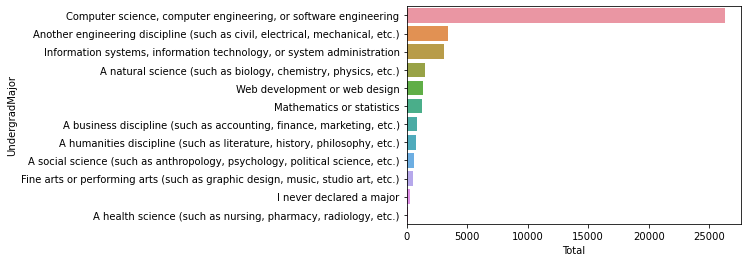

In [14]:
#this graphic shows the values with missing values

sb.countplot(data = df_developer, y = df_developer['UndergradMajor'], order = grads_index);


plt.xlabel('Total');

With the graph above it is possible to see that there are many professionals who have graduated in Computer Science, but there are also many people who have different academic backgrounds.